In [3]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

1. Importar dataset de winequality-red.csv.

In [4]:
df = pd.read_csv("winequality-red.csv", sep = ";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### PCA

2. Estandarizar los datos

In [5]:
media = df.mean()
desvio = df.std()

df_estandar = (df-media)/desvio

3. Aplicar PCA con todas las componentes principales y obtener las columnas transformadas

In [6]:
len(df_estandar.columns)

12

In [7]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(df_estandar)

4. Transformar columnas transformadas a DataFrame y calcular matriz de correlación de la misma (es el output de pca.fit_transform). Redondear a 2 decimales

In [8]:
pd.DataFrame(X_pca).corr().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,0.0,1.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0
2,-0.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
3,-0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0
4,-0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
5,0.0,-0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,0.0
6,-0.0,0.0,-0.0,0.0,-0.0,0.0,1.0,0.0,0.0,-0.0,0.0,-0.0
7,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,0.0,0.0
8,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0
9,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0


5. Mostrar cuanta variabilidad explica cada una de las variables y seleccionar la cantidad de componentes principales necesarias para explicar por lo menos el 75% de la variablidad

In [9]:
variabilidad = pca.explained_variance_ratio_

In [10]:
variabilidad[0:5]

array([0.26009731, 0.1868235 , 0.14024331, 0.10125174, 0.0811053 ])

In [11]:
sum(variabilidad[0:5])

0.7695211604367583

6. Crear una variable data_clean que contenga una tabla con todas las componentes principales seleccionadas

In [12]:
data_clean = pd.DataFrame(X_pca).loc[:,0:5]

In [13]:
data_clean.head(2)

,0,1,2,3,4,5
0,-1.778885,1.156941,-1.386147,-0.044930,0.233811,-0.976677
1,-1.003871,2.071190,0.007756,0.465974,0.182397,0.657569


### Extra: Clusterizar los datos

7. Realizar K-Means para clusterizar los datos. Usar 5 clusters

In [14]:
from sklearn.cluster import KMeans
from sklearn import datasets
# genero modelo
model = KMeans(
    n_clusters=5, # número de centroides
    n_init = 10, # número de semillas diferentes que va a probar el algoritmo
    max_iter = 300 # número de iteraciones que va a hacer hasta encontrar el óptimo en cada semilla
)

model.fit(data_clean)

KMeans(n_clusters=5, n_init=10)

8. Con el método del codo analizar la cantidad óptima de clusters a seleccionar

In [15]:
acum = []
for i in range(2,9):
    model = KMeans(
        n_clusters=i, # número de centroides
        n_init = 10, # número de semillas diferentes que va a probar el algoritmo
        max_iter = 300 # número de iteraciones que va a hacer hasta encontrar el óptimo en cada semilla
    )
    model.fit(data_clean)
    acum.append([i,model.inertia_])


In [16]:
tabla_codo = pd.DataFrame(acum,columns=["clusters", "Error"])
tabla_codo

,clusters,Error
0,2,12422.654316
1,3,10681.304481
2,4,9328.175621
3,5,8031.568985
4,6,7310.252632
5,7,6612.556390
6,8,6270.710238


<Axes: xlabel='clusters', ylabel='Error'>

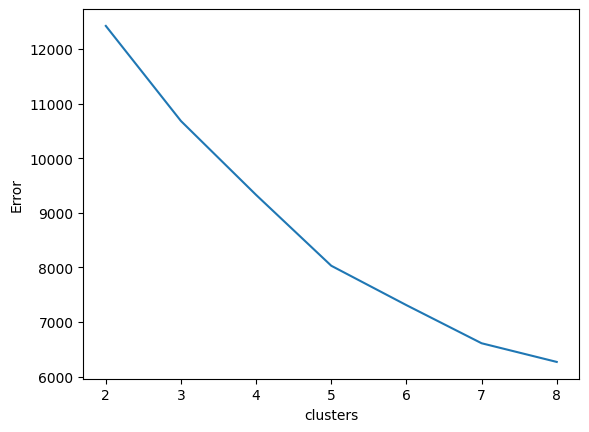

In [17]:
sns.lineplot(data = tabla_codo, x = "clusters", y = "Error")